# Minimize Function in TensorFlow

In [1]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from IPython import display

In [2]:
def plot():
    display.clear_output(wait=True)
    plt.figure(figsize=(15, 10))
    
    def func(x_v):
        return a[0] * x_v**2 + b[0] * x_v
    
    plt.subplot(221)
    
    plt.plot(y)
    plt.xlabel("iterations")
    plt.ylabel("minimum value")
    plt.subplot(222)
    
    off = 1
    linsp = np.linspace(-off+a[0], off+a[0])
    plt.scatter(x, func(x), c='r')
    plt.plot(linsp, [func(i) for i in linsp])
    plt.xlabel("x")
    plt.ylabel("func(x)")

    plt.show()

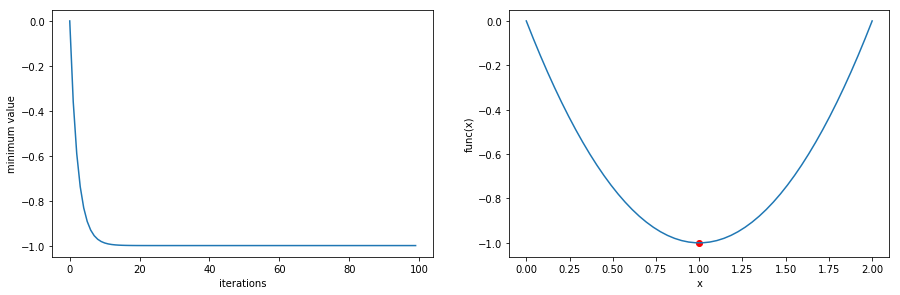

Iteration = 99  - minimum (x, y) = 1.0000002 , -1.0


In [3]:
# create placeholders for coefficients, a and b
a_op = tf.placeholder(tf.float32, shape=(1))
b_op = tf.placeholder(tf.float32, shape=(1))

# create variable for x, initialized to 2.0
x_op = tf.Variable([2.0], dtype=tf.float32)

# construct functional form
y_op = a_op * x_op **2 + b_op * x_op

# using optimizer with learning rate to minimize the function
optimizer = tf.train.GradientDescentOptimizer(0.1).minimize(y_op)

a = [ 1.0]; b = [-2.0]; y = []

with tf.Session() as sess:
    # initialize variables, x
    sess.run(tf.global_variables_initializer())
    
    # run epochs
    for i in range(100):
        # Session runs min_step to minimize function
        _ , y_p = sess.run([optimizer, y_op], feed_dict = {a_op: a, b_op: b})
        
        # save data for plot and plot
        y.append(y_p)
        x = sess.run(x_op)
        plot()
        print("Iteration =", i, " - minimum (x, y) =", x[0], ",", y_p[0])

    # output the x value
    x = sess.run(x_op)